### The objective is to build a model to predict brain tumor from X-ray images.

In [1]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt
import os
from imutils import paths
import random 

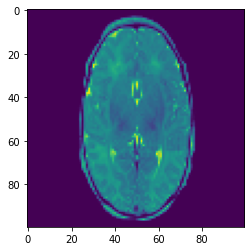

In [2]:
data_dir = '/home/bipin_sunny/Downloads/practice_project/data/brain_tumor_dataset'
categories = ['yes','no']
IMAGE_SIZE = 100
for category in categories:
    path = os.path.join(data_dir,category)
    for img in os.listdir(path):
        img_array=cv2.imread( os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array2 = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
        plt.imshow(img_array2)

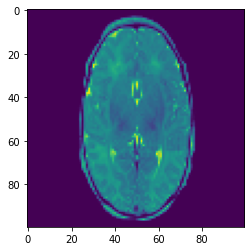

In [3]:
data_dir1 = '/home/bipin_sunny/Downloads/practice_project/data/brain_tumor_dataset/validation'
categories = ['yes','no']
IMAGE_SIZE = 100
for category in categories:
    path = os.path.join(data_dir1,category)
    for img in os.listdir(path):
        img_array3=cv2.imread( os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array4 = cv2.resize(img_array3,(IMAGE_SIZE,IMAGE_SIZE))
        plt.imshow(img_array4)

In [4]:
print(len(img_array))

280


In [5]:
print(len(img_array2))

100


In [6]:
img_array2.shape

(100, 100)

## Building Training data

In [7]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread( os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            img_array2 = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
            training_data.append([img_array2,class_num])
    
create_training_data()
    

In [8]:
print(len(training_data))

247


In [9]:
random.shuffle(training_data)

In [10]:
for sample in training_data:
    print(sample[1])

0
1
0
0
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
0
1
1
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
1
0
1
1
0
0
1
0
0
1
0
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
1
0
1
1
1
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0


In [11]:
X = []
y = []

In [12]:
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
y = np.array(y)

## Build Validation data

In [13]:


validation_data = []

def create_validation_data():
    for category in categories:
        path = os.path.join(data_dir1,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array3=cv2.imread( os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            img_array4 = cv2.resize(img_array3,(IMAGE_SIZE,IMAGE_SIZE))
            validation_data.append([img_array4,class_num])
    
create_validation_data()
    

In [14]:
print(len(validation_data))

247


In [15]:
random.shuffle(validation_data)

In [16]:
for sample in validation_data:
    print(sample[1])

1
1
0
0
0
1
0
1
1
0
0
0
1
0
1
0
0
1
1
1
1
0
0
0
1
0
1
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
0
0
1
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
1
0
1
0
0
0


In [17]:
x_val = []
y_val = []

In [18]:
for features,label in validation_data:
    x_val.append(features)
    y_val.append(label)
x_val= np.array(x_val).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
y_val = np.array(y_val)

In [19]:
print(len(x_val))

247


## Training Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D

X = X/255.0

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics= ['accuracy'])

In [21]:
model.fit(X,y,batch_size=32,epochs=10,validation_data= (x_val,y_val))

Epoch 1/10
8/8 [==============================] - 3s 350ms/step - loss: 0.8597 - accuracy: 0.6599 - val_loss: 39.1573 - val_accuracy: 0.7854
Epoch 2/10
8/8 [==============================] - 3s 330ms/step - loss: 0.4927 - accuracy: 0.7895 - val_loss: 45.3107 - val_accuracy: 0.8178
Epoch 3/10
8/8 [==============================] - 3s 328ms/step - loss: 0.4292 - accuracy: 0.8097 - val_loss: 30.5727 - val_accuracy: 0.8502
Epoch 4/10
8/8 [==============================] - 3s 328ms/step - loss: 0.3883 - accuracy: 0.8583 - val_loss: 25.1352 - val_accuracy: 0.8664
Epoch 5/10
8/8 [==============================] - 3s 336ms/step - loss: 0.3156 - accuracy: 0.8785 - val_loss: 18.2206 - val_accuracy: 0.9109
Epoch 6/10
8/8 [==============================] - 3s 334ms/step - loss: 0.2209 - accuracy: 0.9231 - val_loss: 7.4229 - val_accuracy: 0.9433
Epoch 7/10
8/8 [==============================] - 3s 356ms/step - loss: 0.1851 - accuracy: 0.9393 - val_loss: 13.0840 - val_accuracy: 0.9312
Epoch 8/10
8/8